<a href="https://colab.research.google.com/github/noahgift/intermittent-fasting/blob/master/weight_gain_foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Weight Gain/Loss Foods (NHS Study)


### EDA

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/noahgift/intermittent-fasting/master/nhs-foods.csv")
df.head()

,food,4-year-change-per-serving-day-lb,glycemic-index,calories-100g-240ml,carbs,protein,fat,sodium-mg,fiber,url
0,potato chip,1.69,56.0,536.0,57.14,7.14,7.14,429.0,3.6,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
1,french fries (McDONALD'S),3.35,63.0,323.0,42.58,3.41,15.47,189.0,3.9,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
2,"boiled, baked, or mashed potatoes",0.57,85.0,89.0,14.65,1.65,2.82,306.0,1.3,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
3,refined grains (white bread/flour),0.39,75.0,279.0,14.00,9.30,3.49,558.0,2.3,https://fdc.nal.usda.gov/fdc-app.html#/food-de...
4,sweets and deserts (ice cream choc),0.41,51.0,216.0,28.20,3.80,11.00,76.0,1.2,https://fdc.nal.usda.gov/fdc-app.html#/food-de...


In [3]:
df.corr()

,4-year-change-per-serving-day-lb,glycemic-index,calories-100g-240ml,carbs,protein,fat,sodium-mg,fiber
4-year-change-per-serving-day-lb,1.000000,0.175454,0.238164,0.563404,-0.006180,-0.044574,0.231039,0.095640
glycemic-index,0.175454,1.000000,-0.464994,0.569849,-0.627321,-0.652826,-0.357359,0.217795
calories-100g-240ml,0.238164,-0.464994,1.000000,0.092463,0.315562,0.857887,0.340655,0.348545
carbs,0.563404,0.569849,0.092463,1.000000,-0.335677,-0.322496,-0.247176,0.454230
protein,-0.006180,-0.627321,0.315562,-0.335677,1.000000,0.267202,0.312937,-0.046021
fat,-0.044574,-0.652826,0.857887,-0.322496,0.267202,1.000000,0.328243,0.188631
sodium-mg,0.231039,-0.357359,0.340655,-0.247176,0.312937,0.328243,1.000000,-0.279001
fiber,0.095640,0.217795,0.348545,0.454230,-0.046021,0.188631,-0.279001,1.000000


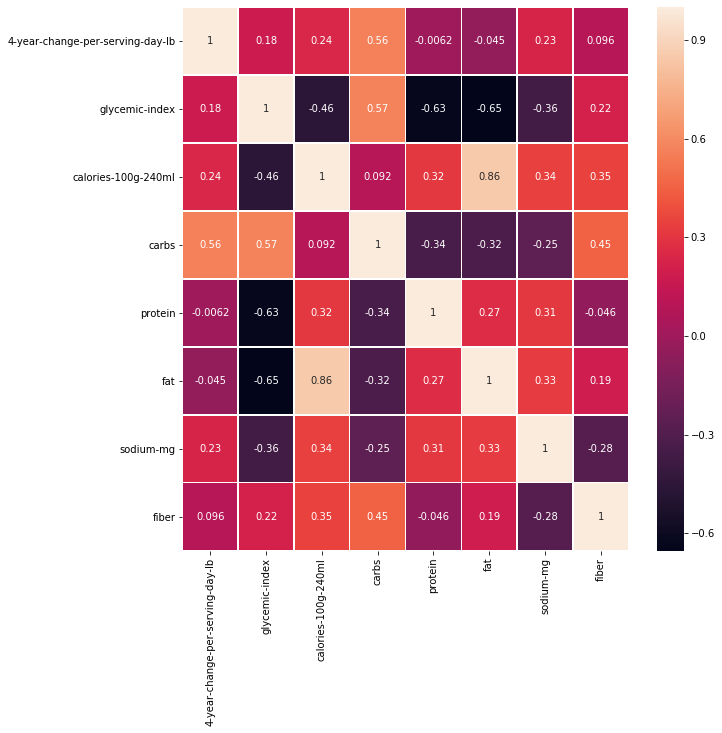

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

## Conclusion

There doesn't appear to be widespread adoption of Data Science approach to some of the new things discovered in Nutritional Science in the last decade.

In looking at the NHS study and expanding it Nutritional components there are some clear patterns that emerge:

* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3151731/
* https://fdc.nal.usda.gov/

A.  High Carbohydrate foods appear to be the strongest correlation with weight gain.

B.  Fat and Protein are essentially neutral

C.  Total Calories and glycemic index are equally as correlated with weight gain.

One firm conclusion would be to **avoid calorically dense, high carbohydrate foods that have a high glycemic index:  i.e. French Fries**.


